# Project: Investigate a Dataset (No Shows Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

> I am trying to find out if various criterias have any relationship to detemine if subject will arrive or not. I am searching for relationship between variables 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received' and subject No-Show    

In [1]:
# Importing packages for the project

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
# Load the data

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
# Check the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Check data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# PatientId is float, changing to character
## ScheduledDay is string, changing to datetime
### AppointmentDay is string, changing to datetime

df.PatientId = df.PatientId.map(lambda x: '{:.0f}'.format(x))
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64[ns]')
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64[ns]')

In [6]:
# Check the updated data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Check data types
df.dtypes

PatientId                 object
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

### Data Cleaning: This will involve below steps:
1) Check and remove duplicate records
2) Check and remove Null values
3) Rename columns to make them consistent
4) Delete irrelevent observations

In [8]:
#Check and remove duplicate records
sum(df.duplicated()) # no duplicate record exist

0

In [9]:
#Check and remove Null values
df.info()  # no null values exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 10.1+ MB


In [10]:
#Rename columns to make them consistent
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [11]:
#Check updated column names
df.info()  #with new column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null object
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 10.1+ MB


In [12]:
df[df['age'] < 0 ] #This patient has age as -1, which does not seems to be correct, This record has to be deleted

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
df.shape

(110527, 14)

In [14]:
df = df[df['age'] >= 0 ] # Dropped row with age as -1

In [15]:
df.shape

(110526, 14)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Let's explore the data in Univariate)

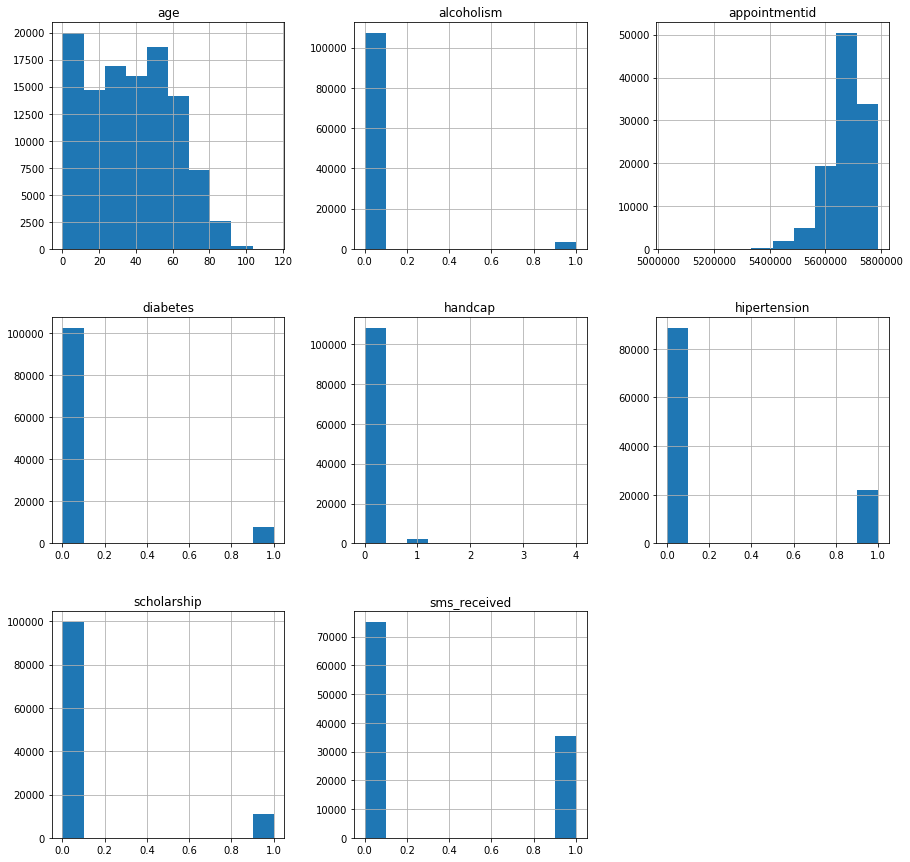

In [16]:
df.hist(figsize=(15,15));

From the above charts we may analyse that:
1) Age, Handicap, hypertension, scholership & sms-received is skewed to the right
2) Most of the subject in the study are non alcoholic & non diabetic

### Research Question 2  (What is the relationship between different variables and no_show)

In [17]:
# Find unique values for no_show
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

Create 2 different datasets: 
1) Containg records where subject went at the appointment
2) Containg records where subject did not go at the appointment

In [18]:
# Create two datasets: 
#Dataset with subjects attending the appointment
df_y = df.query('no_show == "No"')

In [19]:
#Dataset with subjects not attending the appointment
df_n = df.query('no_show == "Yes"')

In [20]:
# Defining function percent, to be used multiple times in the analysis
def percent(key,value):
    return sum(df_y[key] == value)/sum(df[key] == value)*100

# Question: How gender is affecting the appointment

In [21]:
#Check different values of gender
df.gender.unique()

array(['F', 'M'], dtype=object)

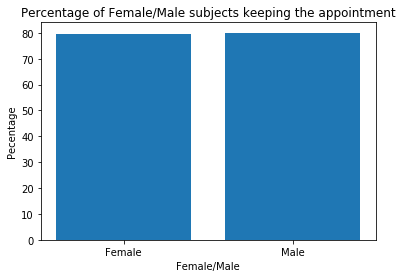

In [22]:
## How much female percentage and how much male percentage are attending the appointment
female_attending_percent = percent('gender','F')
male_attending_percent = percent('gender','M')

plt.bar(["Female", "Male"], [female_attending_percent, male_attending_percent]);
plt.title("Percentage of Female/Male subjects keeping the appointment")
plt.xlabel("Female/Male")
plt.ylabel("Pecentage");

79.68% of the female & 80.03% of male attended the appointment, which is almost the same. This means that gender is not making any difference.

# Question: How scholership is affecting the appointment

In [23]:
#Check different values of scholership
df.scholarship.unique()

array([0, 1], dtype=int64)

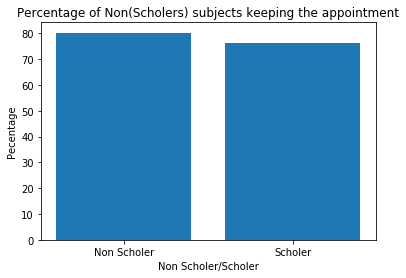

In [24]:
## How much Non Scholer percentage and how much Scholer percentage are attending the appointment

non_scholer_attending_percent = percent('scholarship',0)
scholer_attending_percent = percent('scholarship',1)

plt.bar(["Non Scholer", "Scholer"], [non_scholer_attending_percent, scholer_attending_percent]);
plt.title("Percentage of Non(Scholers) subjects keeping the appointment")
plt.xlabel("Non Scholer/Scholer")
plt.ylabel("Pecentage");

80.19% of non scholers and 76.26% of scholers are attending the appointment, which is almost the same. This means that scholership is not making much difference either.

Note: The sample of scholers are very less compared to non-scholers. This makes the finding less relevent.

# Question: How hipertension is affecting the appointment

In [25]:
#Check different values of hipertension
df.hipertension.unique()

array([1, 0], dtype=int64)

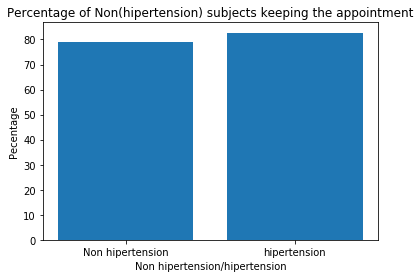

In [26]:
## How much Non hipertension percentage and how much hipertension percentage are attending the appointment

non_hipertension_attending_percent = percent('hipertension',0)
hipertension_attending_percent = percent('hipertension',1)

plt.bar(["Non hipertension", "hipertension"], [non_hipertension_attending_percent, hipertension_attending_percent]);
plt.title("Percentage of Non(hipertension) subjects keeping the appointment")
plt.xlabel("Non hipertension/hipertension")
plt.ylabel("Pecentage");

79.09% of non hipertension subjects and 82.69% of hipertension subjects are attending the appointment, which is almost the same. This means that hypertension is not making much difference either.

# Question: How Diebetes is affecting the appointment

In [27]:
#Check different values of diabetes
df.diabetes.unique()

array([0, 1], dtype=int64)

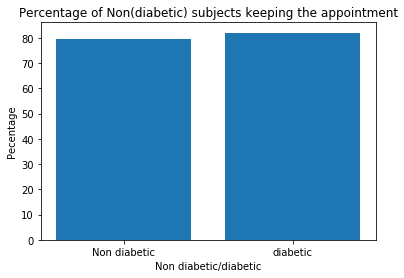

In [28]:
## How much Non hipertension percentage and how much hipertension percentage are attending the appointment

non_diabetic_attending_percent = percent('diabetes',0)
diabetic_attending_percent = percent('diabetes',1)

plt.bar(["Non diabetic", "diabetic"], [non_diabetic_attending_percent, diabetic_attending_percent]);
plt.title("Percentage of Non(diabetic) subjects keeping the appointment")
plt.xlabel("Non diabetic/diabetic")
plt.ylabel("Pecentage");

79.64% of non-diabetic and 82% of diabetic subjects are attending the appointment, which is almost the same. This means that 
diabetes is not making much difference either.

Note: The sample of diabetic subjects are very less compared to non-diabetic. This makes the finding less relevent.

# Question: How Alcoholism is affecting the appointment

In [29]:
#Check different values of alcoholism
df.alcoholism.unique()

array([0, 1], dtype=int64)

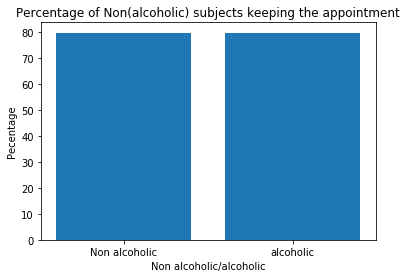

In [30]:
## How much Non Alcoholic percentage and how much Alcoholic percentage are attending the appointment

non_alcoholic_attending_percent = percent('alcoholism',0)
alcoholic_attending_percent = percent('alcoholism',1)

plt.bar(["Non alcoholic", "alcoholic"], [non_alcoholic_attending_percent, alcoholic_attending_percent]);
plt.title("Percentage of Non(alcoholic) subjects keeping the appointment")
plt.xlabel("Non alcoholic/alcoholic")
plt.ylabel("Pecentage");

79.80% non-alcoholic and 79.85% of alcoholic subjects are attending the appointment, which is same. This means that alcoholism  
is not making any difference.

# Question: How handicap is affecting the appointment

In [31]:
#Check different values of handcap
df.handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

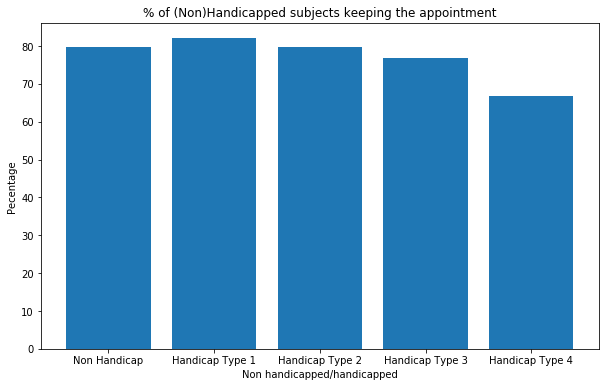

In [32]:
## How much Non handicap percentage and how much different handicap percentage are attending the appointment

handicap_attending_percent = percent('handcap',0)
handicap1_attending_percent = percent('handcap',1)
handicap2_attending_percent = percent('handcap',2)
handicap3_attending_percent = percent('handcap',3)
handicap4_attending_percent = percent('handcap',4)

plt.figure(figsize=(10,6)) 
plt.bar(["Non Handicap", "Handicap Type 1", "Handicap Type 2", "Handicap Type 3", "Handicap Type 4"],
        [handicap_attending_percent, handicap1_attending_percent, handicap2_attending_percent, 
        handicap3_attending_percent, handicap4_attending_percent]);
plt.title("% of (Non)Handicapped subjects keeping the appointment")
plt.xlabel("Non handicapped/handicapped")
plt.ylabel("Pecentage");

Below is the percentage of Hadicapped subjects:
1) Non Handicapped: 79.76%
2) Handicapped Type 1: 82.07%
3) Handicapped Type 2: 79.78%
4) Handicapped Type 3:  76.92%
5) Handicapped Type 4:  66.66%
This means that the handicapped type 1 subject are most probable to join the appointment and handicapped type 4 subject are least
probable to join the appointment.

Note: The sample of Handicapped Type 1, 2, 3 & 4 are very less compared to Non Handicapped subjects and this makes the finding 
    less relevent

# Question: Is sending SMS affecting the appointment

In [33]:
#Check different values of sms_received
df.sms_received.unique()

array([0, 1], dtype=int64)

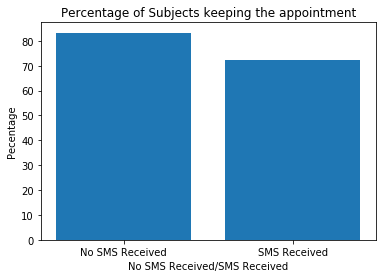

In [34]:
## How much Non SMSed percentage and how much SMSed percentage are attending the appointment

nosms_attending_percent = percent('sms_received',0)
sms_attending_percent = percent('sms_received',1)

plt.bar(["No SMS Received", "SMS Received"], [nosms_attending_percent, sms_attending_percent]);
plt.title("Percentage of Subjects keeping the appointment")
plt.xlabel("No SMS Received/SMS Received")
plt.ylabel("Pecentage");

83.29% of the subjects who did not receive the sms and 72.42% of the subjects who receive the sms attend the appoinment.
Surprisingly reminder smses are making subjects less probable to attend the appointment.

# Question: Are different variables together affecting the appointment

In [35]:
most_probability = len(df_y[(df_y['scholarship'] == 0) & (df_y['hipertension'] == 1) & (df_y['diabetes'] == 1) 
       & (df_y['sms_received'] == 0) & (df_y['handcap'] == 1)])/len(df[(df['scholarship'] == 0) & (df['hipertension'] == 1) 
       & (df['diabetes'] == 1) & (df['sms_received'] == 0) & (df['handcap'] == 1)])*100

'Probability for type 1 subjects (in %):', round(most_probability,2)

('Probability for type 1 subjects (in %):', 87.62)

In [38]:
least_probability = len(df_y[(df_y['scholarship'] == 1) & (df_y['hipertension'] == 0) & (df_y['diabetes'] == 0) 
       & (df_y['sms_received'] == 1) & (df_y['handcap'] == 1)])/len(df[(df['scholarship'] == 1) & (df['hipertension'] == 0) 
       & (df['diabetes'] == 0) & (df['sms_received'] == 1) & (df['handcap'] == 1)])*100

'Probability for type 2 subjects (in %):', round(least_probability,2)

('Probability for type 2 subjects (in %):', 54.17)

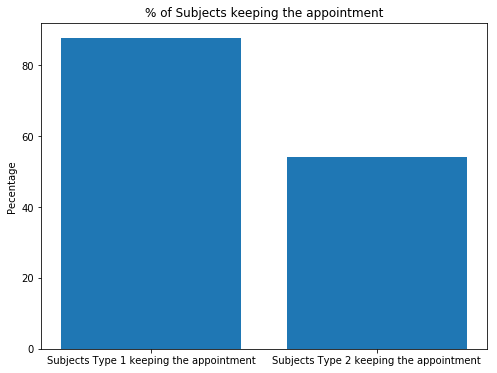

In [37]:
plt.figure(figsize=(8,6)) 
plt.bar(["Subjects Type 1 keeping the appointment", "Subjects Type 2 keeping the appointment"], 
        [most_probability, least_probability]);
plt.title("% of Subjects keeping the appointment")
plt.ylabel("Pecentage");

From the above anlysis we can analyze that:
1) Non scholer subjects, having hipertension, diabetes, handicap type 4 and ones who did not receive the SMS are more probable to attend the appointment
2) Scholer subjects, having no hipertension, no diabetes, handicap type 1 and ones who did receive the SMS are least probable to attend the appointment

<a id='conclusions'></a>
## Conclusions

> The data does not provide much information. There does not seems to be any correlation between No-Show and much of the varibles. Neverthless I was able to draw below coclusions with help of multiple variable:

1) Non scholer subjects, having hipertension, diabetes, handicap type 4 and ones who did not receive the SMS had the highest probabilty to attend the appointment i.e, 87.6%

2) Scholer subjects, having no hipertension, no diabetes, handicap type 1 and ones who did receive the SMS had the lowest probabilty to attend the appointment i.e, 54.16%

> Limitations: 

1) The data is skewed to the right and this makes it very difficult to capture the trend. Many of the variables have very less sample for alternate cases. Had the data been more symmetric, it would have been easier to get the trend.